In this notebook we are going to generate data from a Gaussian distribution and then estimate a confidence interval (CI) for the data we have. Then we are then going to run the experiment 100 times and see how many times our confidence interval contains the true value of the parameter. Finally, we are going to see how the estimate of the mean and the CI change as we get more and more data.

In [2]:
#import all packages we need

import math

import numpy as np
import sklearn as skl
import scipy as sp
from scipy import stats

#check the version of numpy

print(np.__version__)

#initialize random seed of numpy random number generator with your ID number("matricola")
ID_number = 1100285
np.random.seed(ID_number)

1.15.1


# Generate random data points from a Gaussian with given mean and variance

**TO DO**: complete the functions below. The first one returns a value taken at random from a normal distribution with the given mean and variance, while the second one uses the first one and returns a numpy array of $num\_samples$ values taken at random from a normal distribution with the given mean and variance. For the first function, you can use the $random$ package in numpy.

In [3]:
def generate_point(mean, variance):
    #TO DO: ADD CODE
    return np.random.normal(mean, math.sqrt(variance))
def generate_dataset(mean, variance,num_samples):
    #TO DO: ADD CODE
    dataset = list()
    for i in range (num_samples):
        dataset.append(generate_point(mean, variance))
    return np.array(dataset)

# Obtain maximum likelihood estimate (MLE) of the mean from the data

**TO DO**: complete the function below so that given a dataset (as a numpy array) returns the MLE for the dataset

In [4]:
def MLE_mean(dataset):
    #TO DO: ADD CODE
    sum_vals = 0.
    for elem in dataset:
        sum_vals+= elem
    return sum_vals/len(dataset)

# Get Confidence Interval

**TO DO**: complete the function below so that given the MLE estimate $mean\_hat$ of the mean, the variance $variance$ used to generate the data, the number $num\_samples$ of samples in the dataset, and a value $\alpha$, returns the lower bound and the upper bound of CI of confidence $1-\alpha$

In [5]:
def CI_Normal(mean_hat, variance, num_samples, alpha):
    #TO DO: ADD CODE
    z = sp.stats.norm.ppf(1.-alpha/2 ,0, 1)
    lower_bound = mean_hat - z*(math.sqrt(variance)/math.sqrt(num_samples))
    upper_bound = mean_hat + z*(math.sqrt(variance)/math.sqrt(num_samples))
    return lower_bound, upper_bound

Now we put everything together: generate a dataset with the given parameters, estimate the MLE for the mean and the CI, and print the lower bound and the upper bound of the CI.

In [6]:
#parameters for experiment
m = 100
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05

data = generate_dataset(true_mean, true_variance, m)
estimated_mean = MLE_mean(data)
lb, ub = CI_Normal(estimated_mean, true_variance, m, significance_level)
print(lb)
print(ub)

1.2217063124833443
1.7760678422232155


**TO DO**: repeat the experiment above 1000 times and print the fraction of times that the CI does not contain the true value of the mean.

In [7]:
#now let's repeat the experiment N times and see how many times the confidence interval 
#we estimate contains the true value of the parameter

#parameters for experiment
m = 100
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05
num_rep = 1000

#TO DO: ADD CODE
fraction_failures=0.
for i in range(num_rep):
    data = generate_dataset(true_mean, true_variance, m)
    estimated_mean = MLE_mean(data)
    lb, ub = CI_Normal(estimated_mean, true_variance, m, significance_level)
    if(true_mean< lb or true_mean > ub):
        fraction_failures+=1
fraction_failures = fraction_failures / num_rep 
print("Fraction of times we did not get a CI containing the correct value: "+str(fraction_failures))

Fraction of times we did not get a CI containing the correct value: 0.049


**TO DO**: what is the relation between $\alpha$ and the fraction of times the CI contains the true value of the mean?

# Compute CI for increasing number of samples
Now we compute a CI after adding 1 sample at the time to a dataset and plot the corresponding values using matplotlib. To generate 1 sample just use the function $generate\_dataset$ for 1 sample.

**TO DO**: complete the code below so that the following cell plots the true value of the mean, the MLE of the mean after the generation of each sample, and the CI after the generation of each sample

In [9]:
#parameters for experiment
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05
max_num_samples = 1000

#list used to keep the points generated up to the current iteration:
#data_list[i] = (i+1)-th sample
data_list = list()
#list of lower bounds of the CI: lbs[i]=lower bound of CI after i+1 samples have
#been generated
lbs = np.zeros(max_num_samples)
#list of upper bounds of the CI: ubs[i]=upper bound of CI after i+1 samples have
#been generated
ubs = np.zeros(max_num_samples)
#list of MLE for the mean: estimated_means[i]=MLE of the mean after i+1 samples have
#been generated
estimated_means = np.zeros(max_num_samples)
#list of number of samples generated: num_samples[i]= number of samples after i+1 
#samples have been generated
num_samples = np.zeros(max_num_samples)

for m in range(max_num_samples):
    #TO DO: add code
    new_data =  generate_dataset(true_mean, true_variance, 1)
    data_list.append(new_data[0])
    curr_data = np.array(data_list)
        
    #TO DO: add code
    estimated_means[m] = MLE_mean(curr_data)
    lbs[m], ubs[m] = CI_Normal(estimated_mean, true_variance, m+1, significance_level)
    num_samples[m] = m+1

The following plots what is required. **Note**: it assumes that $num\_samples$, $estimated\_means$, $ubs$, $lbs$ are defined as above.

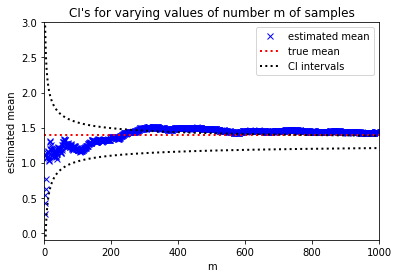

In [10]:
#now plot with matplotlib

#the following is to have matplotlib graphs included in your notebook, next to the code
%matplotlib inline

#Matplotlib(https://matplotlib.org):  2D plotting library
import matplotlib.pyplot as plt

#now plot the estimate MLE as a function of m
plt.plot(num_samples, estimated_means,'xb')
#to obtain control on the axis of the figure, so to customize laberls, limits, etc.
ax1 = plt.gca()
#set limit on x-axis
ax1.set_xlim(0, max_num_samples)
#set limit on y-axis
ax1.set_ylim(-0.1, 3)
#title of the plot
plt.title("CI's for varying values of number m of samples")
#label of x axis
plt.xlabel("m")
#label of y axis
plt.ylabel('estimated mean')
#now plot the correct value of p, just for reference
lines = plt.plot([0.0, max_num_samples],[true_mean, true_mean],'r:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#plot the values from CI's upper bound
lines = plt.plot(num_samples,ubs,'k:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#plot the values from CI's lower bound
lines = plt.plot(num_samples,lbs,'k:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#add the personalized legend
plt.legend(['estimated mean','true mean','CI intervals'])
#change the size of the figure - if needed
#plt.rcParams['figure.figsize'] = (10,10)
#show the figure
plt.show()